## START

In [1]:
import pandas as pd
import sys
sys.path.append('/Users/maria/Desktop/PA/maria-tikhomirova/lib')
import ML_toolkit
import numpy as np

data = pd.read_csv("SML_challenge/data.csv",index_col=None,header=None)
target = pd.read_csv("SML_challenge/target.csv",index_col=None,header=None)
data.isnull().values.any()
target.rename(columns={'0':'target'}, inplace=True)

colnames=[str(x) for x in np.arange(data.shape[1])]
data=pd.DataFrame(columns=colnames,data=data.values)
data['target']=target

data.head()


,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,target
0,0.979587,0.097772,1.583331,1.931710,0.644842,-0.278137,1.151631,0.570353,-1.292430,0.059207,...,9.346990,-5.463344,0.469712,2.129638,-0.160006,4.543330,3.247132,-3.511270,-1.176519,0
1,-0.376475,0.921357,0.421965,0.263991,-0.385927,1.248546,-1.128609,0.017480,0.375447,0.318292,...,7.539836,1.896463,-1.022318,-4.374391,0.102430,-0.682120,-3.232093,1.652254,0.646192,0
2,0.559581,1.489348,0.909945,0.988210,-1.736031,-0.438995,0.939603,0.223140,0.250078,-1.780999,...,7.575404,6.480101,-0.591365,-2.216795,0.527426,-1.029213,-5.699445,1.492750,-0.899959,0
3,-0.085182,-0.375702,0.225221,-0.889564,0.968041,0.523566,1.016407,-0.034082,-0.235755,-0.431575,...,-6.028629,1.422721,0.799216,-0.078402,-0.347944,-2.694026,-1.660664,-3.420544,0.598411,0
4,-0.978559,-0.104433,0.299653,-0.766096,-1.009046,1.736693,-0.582867,-0.758655,1.545842,-3.403964,...,6.470671,1.475969,0.790975,0.333542,0.260437,1.069074,-10.060220,-8.257219,0.960365,0


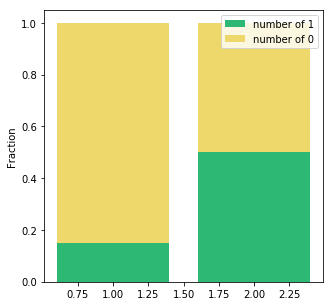

In [2]:

data=ML_toolkit.rescalAllnumeric(data)

X,Y=ML_toolkit.getXY(data,'target',tested=False)

X,Y,class_weights=ML_toolkit.check_and_fix_imbalance(X,Y,plot=True)
#print(np.sum(Y))


Best parameters set found on development set:
{'n_estimators': 420, 'learning_rate': 0.1}


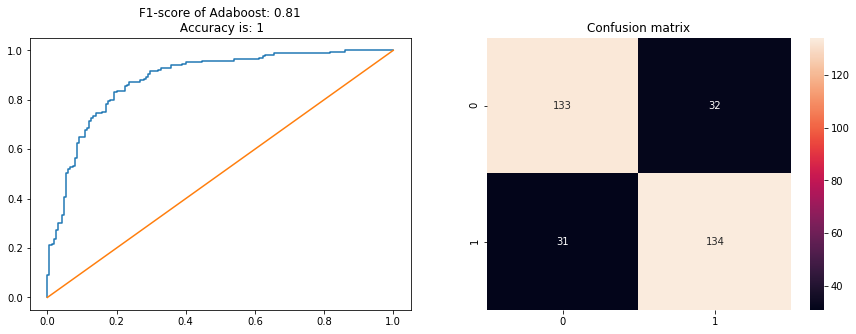

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       165
           1       0.81      0.81      0.81       165

    accuracy                           0.81       330
   macro avg       0.81      0.81      0.81       330
weighted avg       0.81      0.81      0.81       330



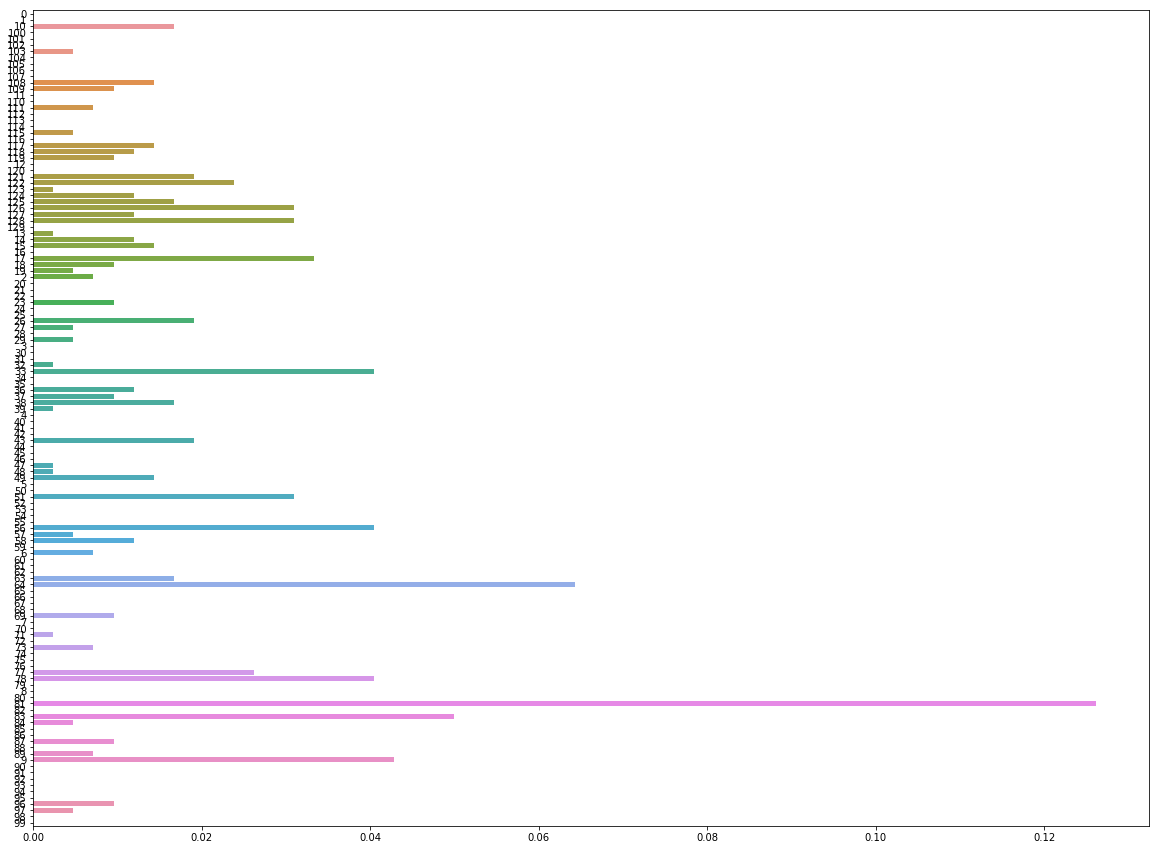

In [3]:
parameters={'n_estimators':np.arange(20,500,50),'learning_rate':np.arange(0.1,1,0.2)}
lioff=ML_toolkit.run_ML(X, Y, 'AdA', parameters)

In [24]:
colstay=lioff['names'][lioff['sup']>0.0045].values
data[np.append(colstay,'target')]

,81,64,83,9,56,33,78,17,51,126,...,2,97,57,103,84,27,29,115,19,target
0,-0.204688,-0.161401,0.566599,0.394161,-0.107857,0.846914,-0.333563,-1.864488,0.218455,1.574345,...,1.571365,-1.023882,-0.208052,0.204866,0.314031,1.317150,0.779037,0.359423,-1.042133,0
1,0.456589,-1.391022,-0.187587,0.502772,-1.812245,-0.238413,-1.397039,-0.753712,-1.688613,-0.182946,...,0.416790,1.262352,1.034934,-0.733460,0.976155,-1.132994,-0.565360,-2.021904,1.076360,0
2,0.371093,0.734382,1.387519,-0.377271,-1.416451,-0.891464,0.967400,-0.033060,1.572990,-0.299672,...,0.901917,1.027392,0.241242,0.729409,1.110932,-1.686514,-2.292930,-0.648646,1.151367,0
3,-0.383081,0.446159,-0.183994,0.188421,-0.354422,-1.313544,0.446554,-0.045192,-1.061472,-0.859540,...,0.221196,0.262826,-0.110126,-0.890181,-0.221946,-0.196373,-0.854928,0.382778,1.385324,0
4,1.146182,0.525870,1.722069,-1.057633,-1.135888,-1.321992,1.085473,-1.286599,0.236593,0.405971,...,0.295192,0.390822,0.675192,-1.442399,0.110223,-1.649354,-0.620045,0.539583,0.396725,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.781980,-0.352616,0.251949,1.362483,-0.960757,-0.273016,0.107876,0.890186,-0.616999,-0.072479,...,0.654892,0.264605,-0.967039,0.190441,-0.674882,0.505603,-0.478101,0.379911,0.776211,0
9996,0.248635,0.060338,-0.371272,0.567001,0.188707,0.224720,-0.134207,-0.277271,0.879151,-0.692197,...,0.373828,1.395421,0.000655,1.987961,0.993059,1.419165,0.660339,0.242227,1.199257,0
9997,0.481769,0.706910,-0.507923,0.219974,-0.572215,-0.474355,-2.169212,-1.858739,-0.984655,-0.726331,...,-0.132664,1.315001,1.155958,0.205152,0.060419,0.556088,-0.016477,1.805369,-0.806548,1
9998,1.710326,1.411999,1.339392,0.983267,-0.420757,0.219601,0.257355,0.113500,-0.230513,-0.956330,...,-0.146228,-2.249771,-0.310257,1.826650,-0.333107,0.674592,-0.075099,-0.198724,-0.379751,0


Best parameters set found on development set:
{'n_estimators': 410, 'max_depth': 9, 'lambda': 0.36787944117144233, 'eta': 0.30000000000000004, 'alpha': 0.01831563888873418}


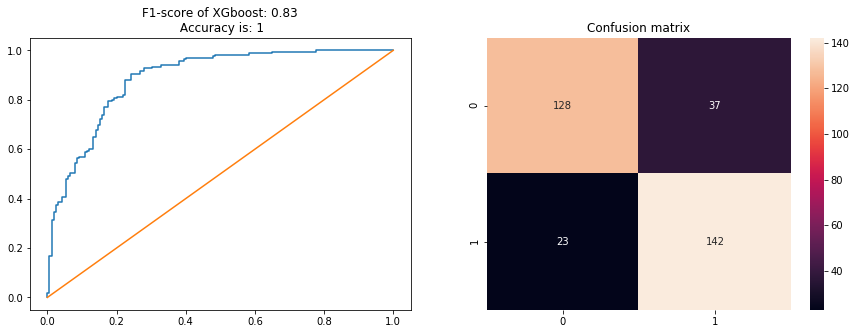

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       165
           1       0.79      0.86      0.83       165

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.82      0.82      0.82       330



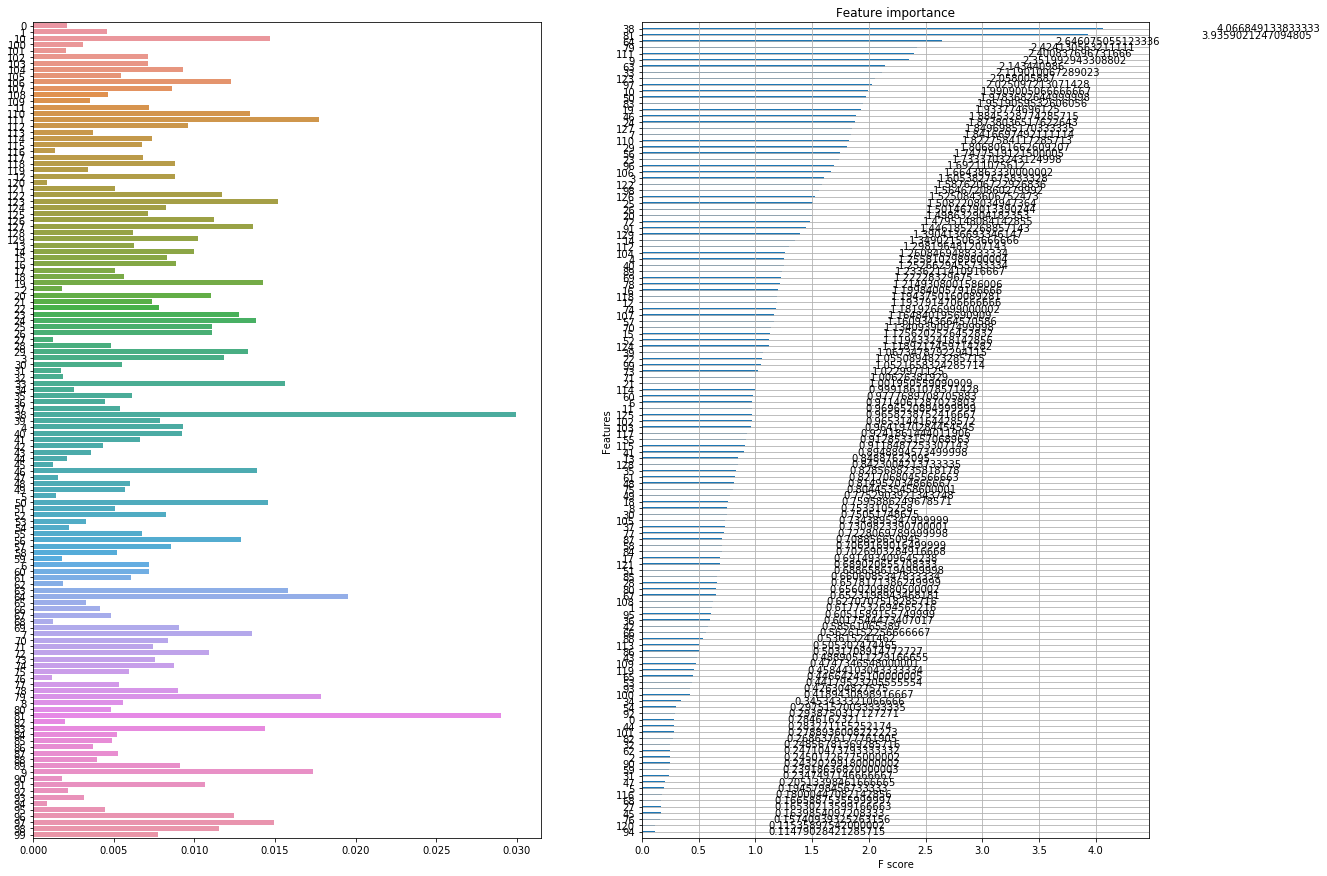

In [3]:
parameters={'n_estimators':np.arange(10,500,50),'eta':np.arange(0.1,1,0.2),
            'max_depth':np.arange(3,10,2),'lambda':np.exp(np.arange(-5,5)),'alpha':np.exp(np.arange(-5,5))}
lioffXB=ML_toolkit.run_ML(X, Y, 'Xboost', parameters)

In [4]:
import pickle
colstay=lioffXB['names'][lioffXB['sup']>0.0045].values
with open('coltostay.pickle', 'wb') as f:
    pickle.dump([colstay], f)


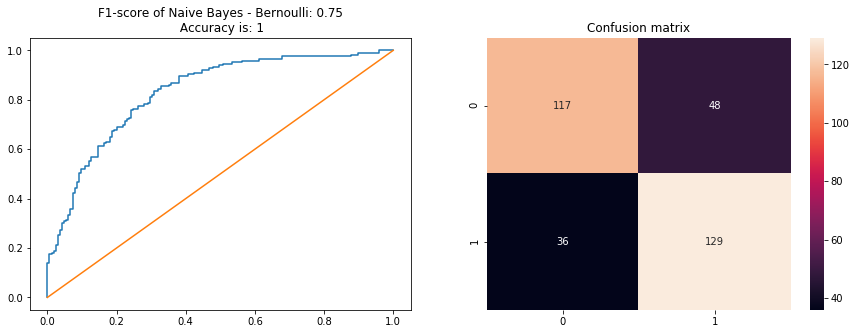

              precision    recall  f1-score   support

           0       0.76      0.71      0.74       165
           1       0.73      0.78      0.75       165

    accuracy                           0.75       330
   macro avg       0.75      0.75      0.75       330
weighted avg       0.75      0.75      0.75       330



[]

In [3]:
parameters = {'var_smoothing': 10^-9}
ML_toolkit.run_ML(X, Y, 'NB_Bernoulli', parameters)

In [3]:
#print('number of 1 %0.f out of %0.f'%(np.sum(Y),len(Y)))

number of 1 500 out of 1000


(10000, 72)
Best parameters set found on development set:
{'n_estimators': 410, 'max_depth': 7, 'lambda': 2.718281828459045, 'eta': 0.8999999999999999, 'alpha': 7.38905609893065}


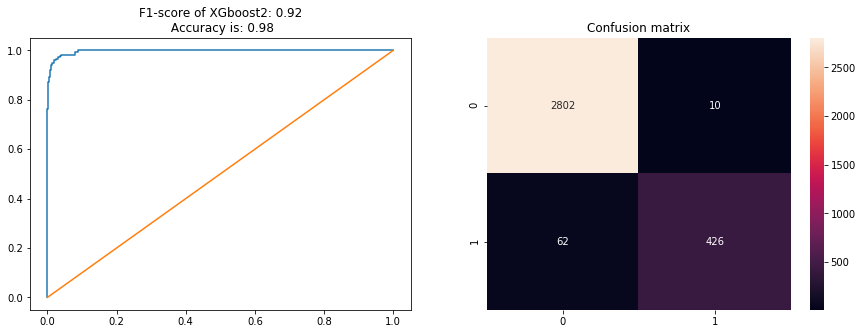

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2812
           1       0.98      0.87      0.92       488

    accuracy                           0.98      3300
   macro avg       0.98      0.93      0.95      3300
weighted avg       0.98      0.98      0.98      3300



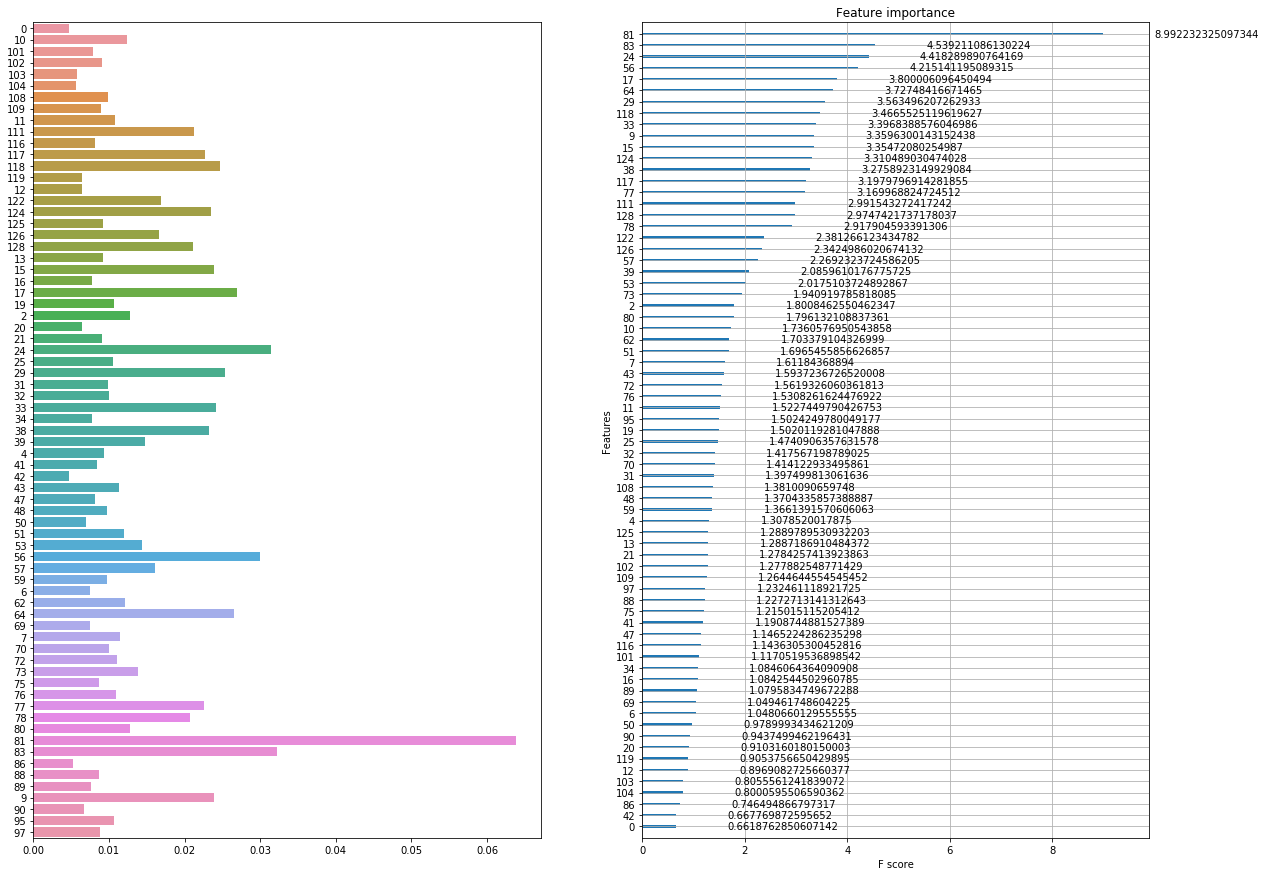

In [3]:
import copy
selected_features_lasso = [
   0, 2, 4, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 19, 20, 21, 24, 25, 29, 31,
   32, 33, 34, 38, 39, 41, 42, 43, 47, 48, 50, 51, 53, 56, 57, 59, 62, 64, 69,
   70, 72, 73, 75, 76, 77, 78, 80, 81, 83, 86, 88, 89, 90, 95, 97, 101, 102,
   103, 104, 108, 109, 111, 116, 117, 118, 119, 122, 124, 125, 126, 128
]
colstay=[str(x) for x in selected_features_lasso]
colstay.append('target')

data2=copy.deepcopy(data[colstay])#,np.append(colstay,'target')
print(data2.shape)
data=ML_toolkit.rescalAllnumeric(data2)

X,Y=ML_toolkit.getXY(data,'target',tested=False)

X,Y,class_weights=ML_toolkit.check_and_fix_imbalance(X,Y,plot=False)
parameters={'n_estimators':np.arange(350,550,10),'eta':np.arange(0.5,1,0.1),
            'max_depth':np.arange(5,10,1),'lambda':np.exp(np.arange(-3,3,0.5)),'alpha':np.exp(np.arange(-5,5))}
datainput=ML_toolkit.run_ML(X, Y, 'Xboost', parameters,class_weights=class_weights)

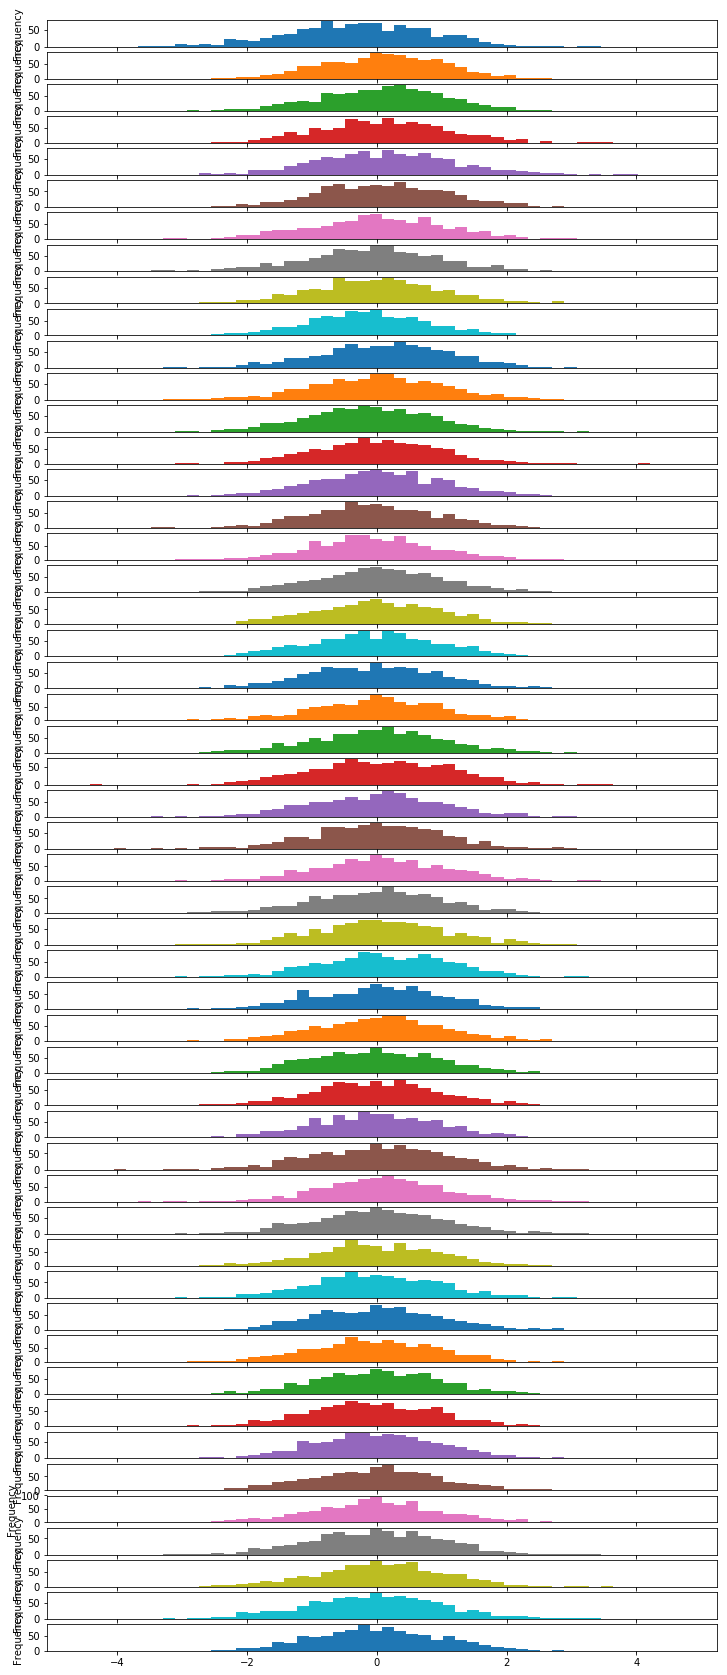

In [29]:
import matplotlib.pyplot as plt
X.plot.hist(subplots=True, legend=False, bins=50, grid=False, figsize=(12,30))
plt.show()

In [17]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.Logit(Y, X2)
est2 = est.fit(maxiter=50)
p_values=est2.pvalues
p_values[p_values<0.05]

         Current function value: 0.335526
         Iterations: 50


/Users/maria/Desktop/PA/maria-tikhomirova/v/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


const    5.282096e-23
13       9.080209e-03
20       4.880390e-02
48       3.725677e-02
57       4.999367e-02
79       2.222150e-02
93       1.548550e-02
dtype: float64

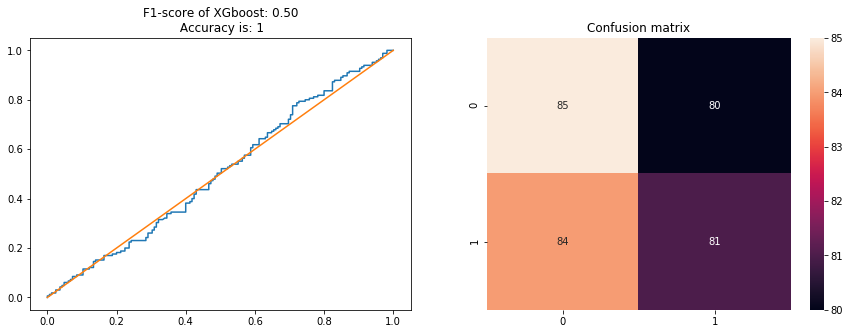

              precision    recall  f1-score   support

           0       0.50      0.52      0.51       165
           1       0.50      0.49      0.50       165

    accuracy                           0.50       330
   macro avg       0.50      0.50      0.50       330
weighted avg       0.50      0.50      0.50       330



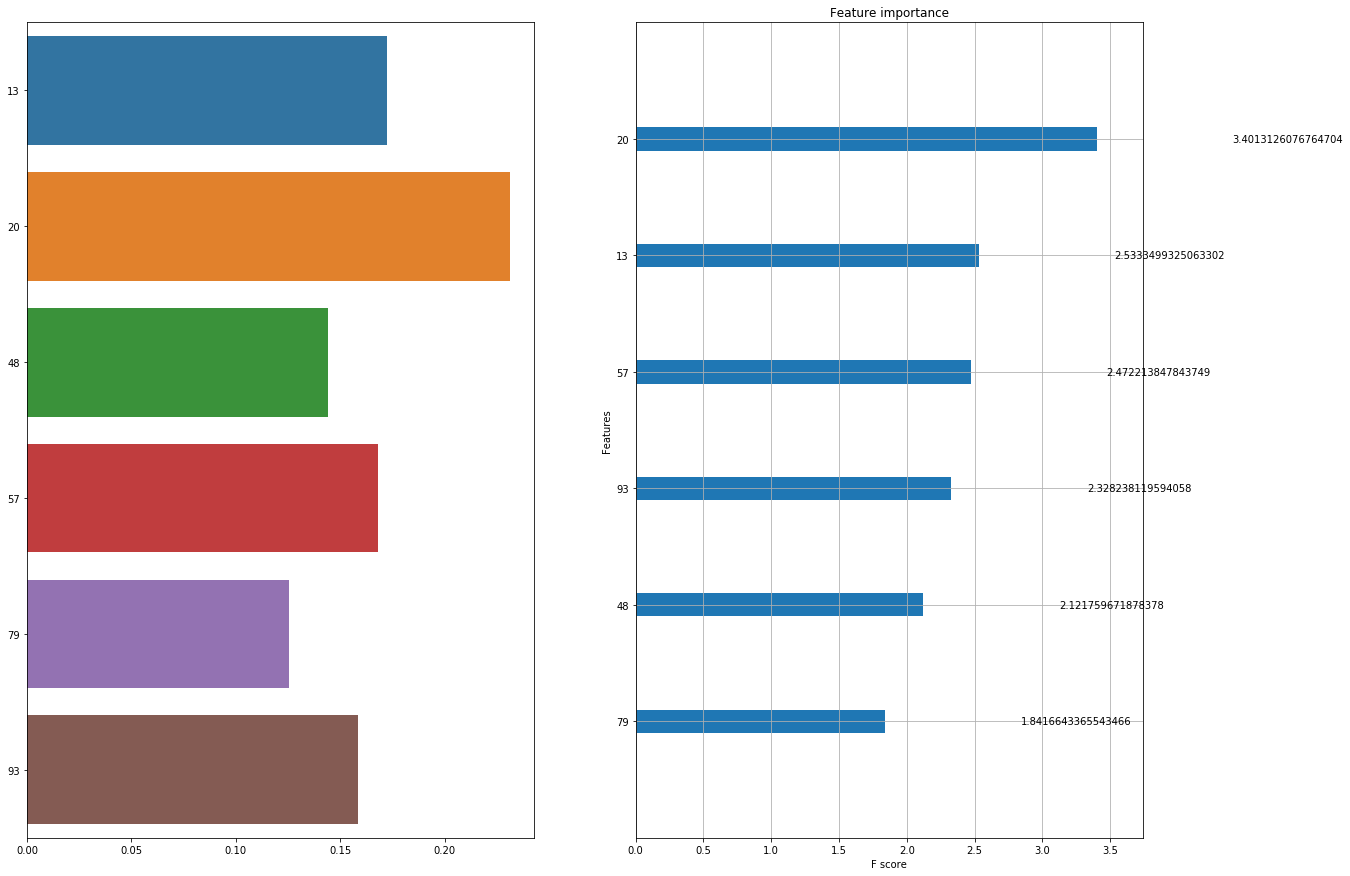

In [20]:
import copy
data2=copy.deepcopy(data[['13','20','48','57','79','93','target']])#,'128','126','56','122','64'

data=ML_toolkit.rescalAllnumeric(data2)

X,Y=ML_toolkit.getXY(data,'target',tested=False)

X,Y,class_weights=ML_toolkit.check_and_fix_imbalance(X,Y,plot=False)
parameters={'n_estimators':np.arange(10,500,50),'eta':np.arange(0.1,1,0.2),
            'max_depth':np.arange(3,10,2),'lambda':np.exp(np.arange(-5,5)),'alpha':np.exp(np.arange(-5,5))}
datainput=ML_toolkit.run_ML(X, Y, 'Xboost', parameters)

In [4]:
data.drop(columns=[])

,0,2,4,6,7,9,10,11,12,13,...,116,117,118,119,122,124,125,126,128,target
0,0.980836,1.571365,0.647288,1.163155,0.561800,0.394161,-0.975993,1.349728,-1.772879,-0.326827,...,1.611383,-0.107667,1.038181,-0.007272,-1.842829,0.754109,-0.181097,1.574345,-0.966206,0
1,-0.379181,0.416790,-0.374036,-1.100267,0.009232,0.502772,-0.592276,-0.319533,1.125157,-0.701909,...,-0.057412,-0.068049,2.940131,-0.722378,0.708840,-1.536699,0.078467,-0.182946,0.927168,0
2,0.559604,0.901917,-1.711768,0.952690,0.214779,-0.377271,-2.076857,-1.081120,-0.483537,0.239223,...,-0.028118,0.864640,1.043214,2.006736,2.298001,-0.776764,0.498811,-0.299672,0.868681,0
3,-0.087038,0.221196,0.967526,1.028927,-0.042302,0.188421,-1.288372,1.671477,1.221233,0.335993,...,0.181749,0.830268,0.529331,0.019282,0.544592,-0.023593,-0.366978,-0.859540,-0.932938,0
4,-0.983021,0.295192,-0.991445,-0.558551,-0.766474,-1.057633,-1.119025,-1.555276,-1.157401,-0.559952,...,0.201857,1.166971,0.726471,-0.485511,0.563053,0.121500,0.234745,0.405971,-2.706463,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.308905,0.654892,-1.564971,0.525413,0.657536,1.362483,-0.302336,-0.890129,1.508106,0.290024,...,-0.319578,-0.507767,1.225717,1.165491,-0.511241,-0.573530,-2.311916,-0.072479,0.763513,0
9996,-0.315816,0.373828,0.685861,1.673622,-0.213594,0.567001,0.079277,0.954554,-0.212734,-0.197469,...,-0.863732,-0.636420,-0.488417,-0.033503,0.033763,0.425237,-0.057982,-0.692197,-0.650147,0
9997,0.723706,-0.132664,0.775364,-0.612021,0.260290,0.219974,0.722886,1.016279,1.869623,1.001824,...,1.384347,-0.390545,1.497705,0.789496,-0.704476,1.670807,1.231014,-0.726331,1.690623,1
9998,0.533249,-0.146228,-0.911796,-1.748995,-0.319923,0.983267,0.083686,-0.931369,-0.015999,1.740414,...,-0.199024,1.041865,0.668499,-0.043535,1.634036,0.440823,-0.587264,-0.956330,-1.436612,0


In [5]:
colname=[]
print(len(colname))

0
